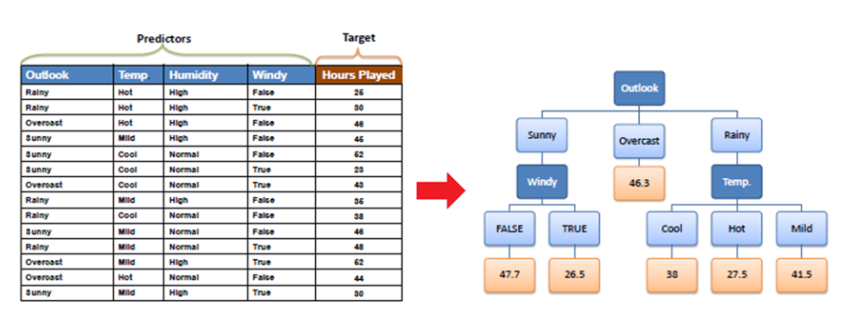

## Decision tree Regression

In [2]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1- Data Ingestion 

In [3]:
import pandas as pd
df = pd.read_csv("PowerPlant.csv")
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


##### 1 AT - Atmospheric temperature
##### 2V - Vaccum pressure in the boiler
##### 3 AP - Atmospheric Pressure
##### 4 RH - Relative Humidity in %
##### 5PE - Power Output in Mega Watts

### Step 2 - Perform basic data Quality checks

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [5]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(41)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9522,15.12,48.92,1011.80,72.93,462.59
9523,33.41,77.95,1010.30,59.72,432.90
9524,15.99,43.34,1014.20,78.66,465.96
9525,17.65,59.87,1018.58,94.65,450.93


### Step 3 - Seprate X and Y(PE)

In [8]:



x = df.drop(columns=["PE"])
Y= df[["PE"]]

In [9]:
x.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [10]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


<Axes: xlabel='PE', ylabel='Count'>

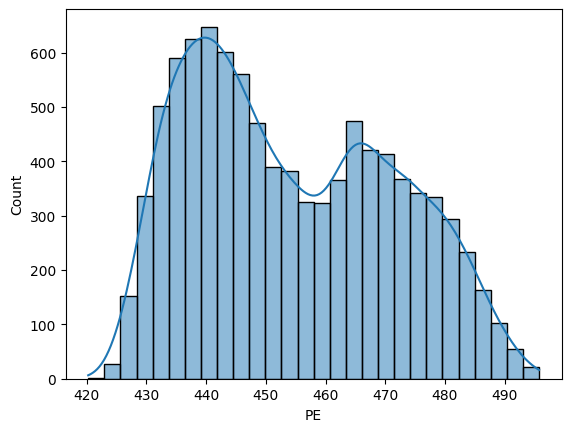

In [11]:
import seaborn as sns
sns.histplot(data=df, x="PE",kde=True)

In [12]:


pip install seaborn

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Apply preprocessing on x 

In [13]:
x.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [14]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [15]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()

).set_output(transform="pandas")

In [16]:
x_pre = num_pipe.fit_transform(x)
x_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Step 5 - Apply Train test split

In [18]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain , ytest = train_test_split(x_pre, Y,test_size=0.2, random_state=42)

In [19]:
xtrain.head() 

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [20]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [21]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [22]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [24]:
xtrain.shape

(7621, 4)

In [25]:
xtest.shape

(1906, 4)

### Step 6 - Model Building and tuninh 

In [26]:
from sklearn.tree import DecisionTreeRegressor
model1 = DecisionTreeRegressor(
    max_depth=1,
    min_samples_leaf=5,
    min_samples_split=5,
    criterion="absolute_error"
)
model1.fit(xtrain,ytrain)

DecisionTreeRegressor(criterion='absolute_error', max_depth=1,
                      min_samples_leaf=5, min_samples_split=5)

In [27]:
model1.score(xtrain,ytrain)

0.7166091272473123

In [28]:
model1.score(xtest,ytest)

0.7239856941587868

### Hyperparameter tunning RandomisedsearchCV

In [31]:
from sklearn.model_selection import RandomizedSearchCV
dtr = DecisionTreeRegressor()
rscv = RandomizedSearchCV(dtr, param_distributions=params, cv=5, scoring="r2", n_jobs=-1)
rscv.fit(xtrain, ytrain)

NameError: name 'params' is not defined